In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
df=pd.read_csv ("/content/diabetic_data.csv")

In [ ]:
print("Number of Record:",len(df))

Number of Record: 101766


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [10]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


info about all numeric values

In [11]:
#lets look at readmission column which says if patient readmitted within 30 or over 30 days or not readmitted.
#lets see how many values are there for each category
df.groupby('readmitted').size()

,0
readmitted,
<30,11357
>30,35545
NO,54864


In [12]:
#similarly for discharge_disposition_id, which tells us where patient went after hospital-> like if the patient is dead or went to hospice or any other medical center
df.groupby('discharge_disposition_id').size()

,0
discharge_disposition_id,
1,60234
2,2128
3,13954
4,815
5,1184
6,12902
7,623
8,108
9,21


In [13]:
from google.colab import files
uploaded = files.upload()

Saving Discharge desc.png to Discharge desc.png


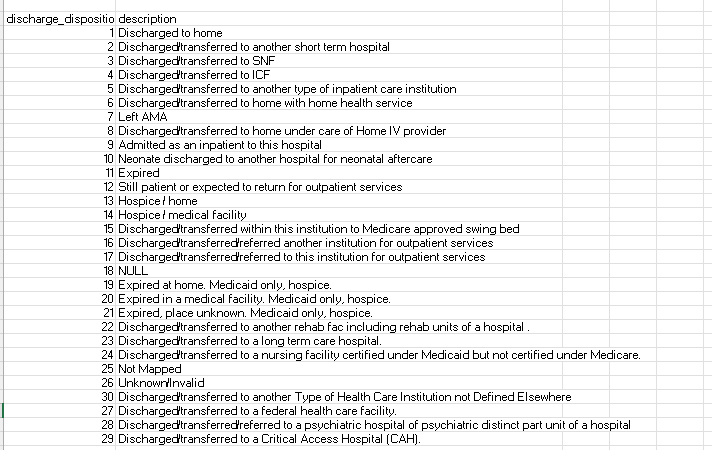

In [14]:
from IPython.display import display
from PIL import Image

image_path = list(uploaded.keys())[0]  # Get the filename
img = Image.open(image_path)
display(img)

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model.

In [16]:
df=df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21 ])]

creating binary classification for output variable focusing on if the patient is likely to be readmitted within 30 days

In [19]:
df['Output_Redamission'] = (df.readmitted == '<30').astype('int')

<ipython-input-19-f9aec1c01225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Output_Redamission'] = (df.readmitted == '<30').astype('int')


In [20]:
def calc_prevalence(y_actual):
  return(sum(y_actual)/len(y_actual))

In [27]:
print('Prevalnce: %.3f'%calc_prevalence(df['Output_Redamission'].values))

Prevalnce: 0.114


In [39]:
# Let's take a look at the unique values for each column.
for c in list(df.columns):
    n = df[c].unique()  # Get unique values of the column
    if len(n) < 30:
        print(c)
        print(n)
    else:
        print(f'{c}: {len(n)} unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out,

- encounter_id and patient_nbr: these are just identifiers and not useful variables
- age and weight: are categorical in this data set
- admission_type_id,discharge_disposition_id,admission_source_id: are numerical here, but are IDs (see IDs_mapping). They should be considered categorical.
- examide and citoglipton only have 1 value, so we will not use these variables
- diag1, diag2, diag3 - are categorical and have a lot of values. We will not use these as part of this project, but you could group these ICD codes to reduce the dimension. We will use number_diagnoses to capture some of this information.
- medical_speciality - has many categorical variables, so we should consider this when making features.

Feature Engineering

In [40]:
#data Preprocessing-dealing with missing values
df = df.replace('?',np.nan)

In [41]:
#lets take a look at all numeric features
num_cols = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [42]:
#check if any missing values
df[num_cols].isnull().sum()

,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0
number_outpatient,0
number_emergency,0
number_inpatient,0
number_diagnoses,0


In [43]:
#lets take a look at our categorical features
cat_cols = ['race', 'gender',
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']

In [44]:
df[cat_cols].isnull().sum()

,0
race,2234
gender,0
max_glu_serum,94191
A1Cresult,82509
metformin,0
repaglinide,0
nateglinide,0
chlorpropamide,0
glimepiride,0
acetohexamide,0


In [45]:
#fill missing values with NA
df['race']=df['race'].fillna('NA')
df['payer_code'] =df['payer_code'].fillna('NA')
df['medical_specialty'] = df['medical_specialty'].fillna('NA')

In [46]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


,0
medical_specialty,
NA,48616
InternalMedicine,14237
Emergency/Trauma,7419
Family/GeneralPractice,7252
Cardiology,5279
...,...
Proctology,1
Surgery-PlasticwithinHeadandNeck,1
Neurophysiology,1



We can see that most of them are unknown and that the count drops off pretty quickly. We don't want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods.

In [47]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [48]:
df.groupby('med_spec').size()


,0
med_spec,
Cardiology,5279
Emergency/Trauma,7419
Family/GeneralPractice,7252
InternalMedicine,14237
Nephrology,1539
Orthopedics,1392
Orthopedics-Reconstructive,1230
Other,56815
Radiologist,1121


In [49]:
df.to_csv('diabetic_data.csv', index=False)

# Download the file
files.download('diabetic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>